<a href="https://colab.research.google.com/github/rmoolchandani/rmoolcha_Capstone/blob/main/Code/Part_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis 

Let's explore the data and see what we can derive. 

__Imports__

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import iqr

__Read the cleaned file and create a pandas dataframe__

In [ ]:
# Connect to Google Drive
# Upload the dataset to your Google drive so it can be loaded here
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/diabetic_data_clean.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data = df.replace("?",np.nan)
data.isnull().sum()[data.isnull().sum()>1]/len(data)*100

Series([], dtype: float64)

In [ ]:
df.drop('Unnamed: 0', axis =1, inplace = True)

In [ ]:
df.shape

(98052, 48)

__Target Variable- Readmission__

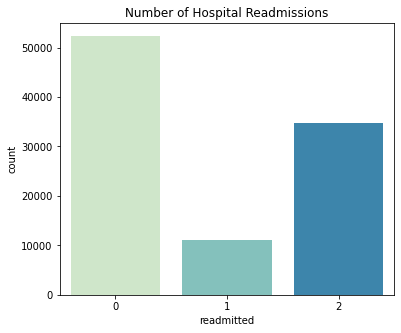

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='readmitted',data=df, palette= 'GnBu')
plt.title('Number of Hospital Readmissions');

In [ ]:
df.readmitted.value_counts()

0    52337
2    34649
1    11066
Name: readmitted, dtype: int64

The target variable 'readmitted' in the initial dataset contained three categories:


    - 0: “No” for no record of readmission. 
    - 1: “<30” if the patient was readmitted in less than 30 days.
    - 2: “>30” if the patient was readmitted in more than 30 days.
    
For our modeling purposes we need to get binary values of 0 and 1, so I've classified the values in this variables as such:

    - 0: “No” for no record of readmission. 
    - 1: “<30” or  “>30”, record of readmission, regardless of how many days after being discharged. 

In [ ]:
df['readmitted'] = pd.Series([0 if val == 0 else 1 for val in df['readmitted']])

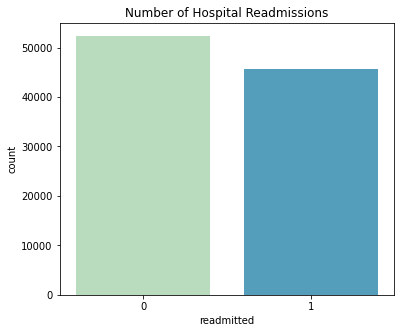

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='readmitted',data=df, palette= 'GnBu')
plt.title('Number of Hospital Readmissions');

In [ ]:
df.readmitted.value_counts(normalize = True)

0    0.533768
1    0.466232
Name: readmitted, dtype: float64

__Let's Explore the other variables and decide how best to utilize them__

In [ ]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_range'],
      dtype='object')

The first two variables in the data set are numeric but are unique identifiers as such won't be used for any ED of statistical analysis. Since these do not affect my modeling in any way, I'll just drop these columns to keep things as clean as possible.

* encounter_id
* patient_nbr


In [ ]:
#First check for any duplicates using this unique identifier
df.drop_duplicates(subset=['encounter_id'], inplace = True)

In [ ]:
df.shape

(98052, 48)

No duplicates noted, still have 98,052 observations to analyze. 

In [ ]:
df.drop(['encounter_id', 'patient_nbr'], axis=1, inplace=True)

### CATEGORICAL VARIABLES

race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id' 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'age_range'
        

__Race__

In [ ]:
df.race.value_counts(normalize = True)

0    0.765706
1    0.192561
3    0.020234
4    0.015125
2    0.006374
Name: race, dtype: float64

* 0: Caucasian
* 1: African American
* 2: Asian
* 3: Hispanic
* 4: Other


* The data collected showcases that 76% of patients within the data set are Caucasian. 

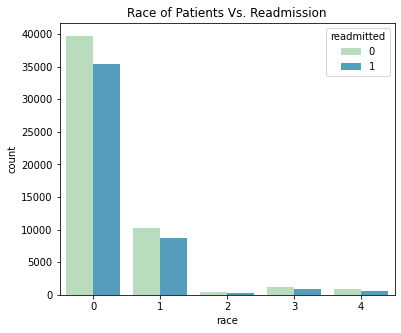

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x = df['race'], hue=df['readmitted'],palette= 'GnBu')
plt.title("Race of Patients Vs. Readmission");

__Gender__

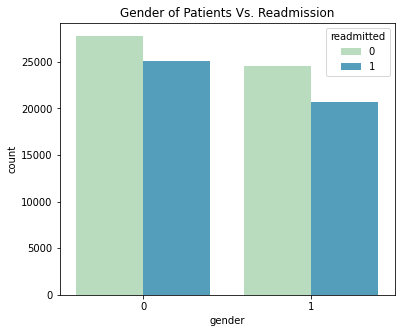

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x = df['gender'], hue=df['readmitted'],palette= 'GnBu')
plt.title("Gender of Patients Vs. Readmission");

In [ ]:
df.gender.value_counts(normalize = True)

0    0.538826
1    0.461174
Name: gender, dtype: float64

__Readmission Rate Based on Age__

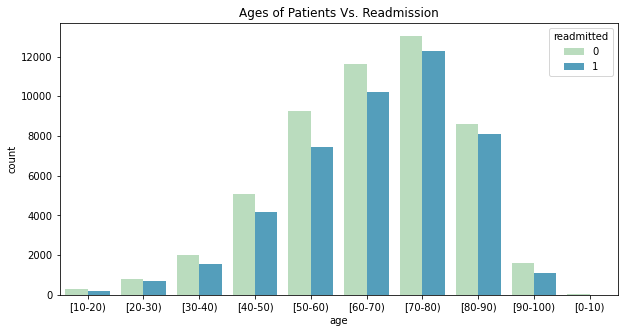

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x = df['age'], hue=df['readmitted'],palette= 'GnBu')
plt.title("Ages of Patients Vs. Readmission");

* In all age groups the number of readmissions never exceeded the number of non-readmissions.
* The age group with the highest readmissions overall were those between 70-80 years of age. 

In [ ]:
df.age.value_counts(normalize = True)

[70-80)     0.258077
[60-70)     0.222423
[80-90)     0.170338
[50-60)     0.170287
[40-50)     0.094491
[30-40)     0.036185
[90-100)    0.027710
[20-30)     0.015074
[10-20)     0.004753
[0-10)      0.000663
Name: age, dtype: float64

__Admission Type__

Integer identifier corresponding to distinct values: 

1. Emergency
2. Urgent
3. Elective
4. Newborn
5. Delivery 
5. Trauma Center 
6. Other

Reduced the initial 9 distinct values to just 6. 

__Soucrce:__ https://www.hcup-us.ahrq.gov/db/vars/atype/nisnote.jsp#values

In [ ]:
df['admission_type_id'] = pd.Series(['Emergency' if val == 1 else'Urgent' if val == 2
                                    else 'Elective' if val == 3
                                     else 'Newborn' if val == 4
                                     else 'Delivery Center' if val ==5
                                     else 'Trauma Center' if val == 6 else 'Other' 
                                              for val in df['admission_type_id']], index=df.index)

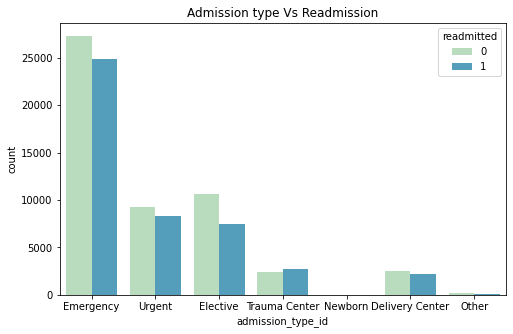

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = df['admission_type_id'], hue=df['readmitted'],palette= 'GnBu')
plt.title("Admission type Vs Readmission");

Emergency  admissions comprise the majority of initial patient admissions as well as readmissions. 

In [ ]:
#Converting back to an integer for modeling purposes moving forward.
df['admission_type_id']= df.admission_type_id.map({'Emergency':0, 'Elective':1, 'Urgent':2,'Trauma Center':3, 'Delivery Center':4,'Newborn':5,'Other':6})

__Discharge Disposition__

Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available. 

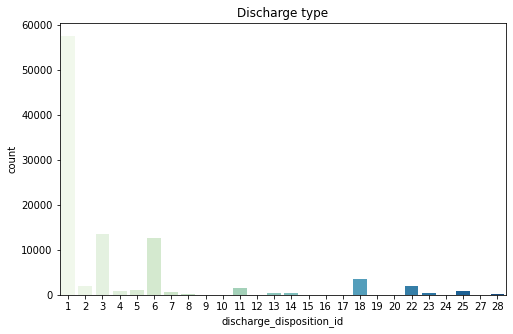

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x ='discharge_disposition_id',data=df, palette= 'GnBu')
plt.title("Discharge type");

Reduced the initial 29 distinct values to just 2, simply quantifying whether a patient was discharged to their home or not.  

In [ ]:
df['discharge_disposition_id'] = pd.Series(['Discharged Home' if val == 1 else 'Other discharge' 
                                              for val in df['discharge_disposition_id']], index=df.index)

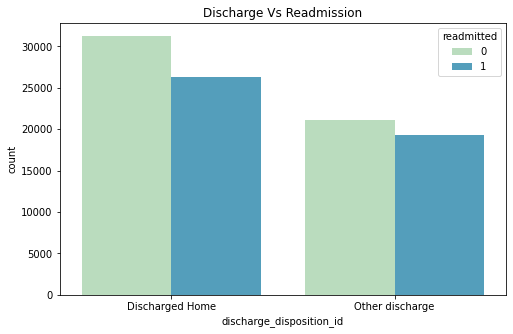

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = df['discharge_disposition_id'], hue=df['readmitted'],palette= 'GnBu')
plt.title("Discharge Vs Readmission");

In [ ]:
#Converting back to an integer for modeling purposes moving forward.
df['discharge_disposition_id']= df.discharge_disposition_id.map({'Discharged Home':0, 'Other discharge':1})

__Admission source__

Indicates the origination of a patient's admission, for example, physician referral, emergency room, and transfer from a hospital. 

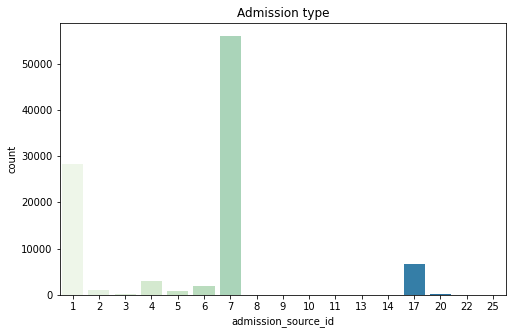

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='admission_source_id',data=df, palette= 'GnBu')
plt.title("Admission type");

In [ ]:
df.admission_source_id.value_counts()

7     55951
1     28355
17     6602
4      2945
6      1893
2      1031
5       846
3       179
20      160
9        49
8        15
22       12
10        7
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64

Based on the value counts above, I decided to reduce the distinct values to simply capture three instances, a physician referral, emergency room referral, or other.  

In [ ]:
df['admission_source_id'] = pd.Series(['Emergency room' if val == 7 else 'Physician/Clinic referral' if val == 1 else 'Other source' 
                                              for val in df['admission_source_id']], index=df.index)

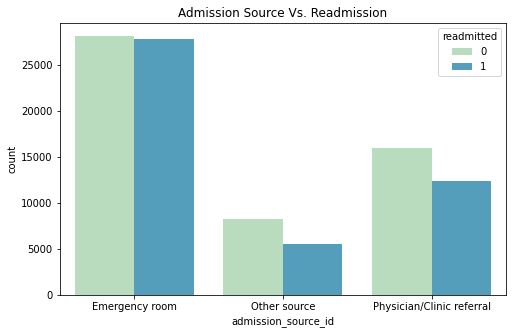

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x = df['admission_source_id'], hue=df['readmitted'],palette= 'GnBu')
plt.title("Admission Source Vs. Readmission");

In [ ]:
#Converting back to an integer for modeling purposes moving forward.
df['admission_source_id']= df.admission_source_id.map({'Emergency room':0, 'Physician/Clinic referral':1,'Other source':2})

__Diagnoses Attributes__

* 'diag_1'- primary diagnoses
* 'diag_2'- secondary diagnosis
* 'diag_3'- additional diagnosis

Each of these indicated a particular level of diagnosis for a given patient. However each had 848-923 distinct values coded as the first three digits of the International Classification of Diseases (ICD- 9). Based on research papers used for my analysis I decided to do what previous researchers and analysts had done and consolidate these into 9 major categories: 
1. Circulatory
2. Respiratory
3. Digestive
4. Diabetes
5. Injury
6. Musculoskeletal
7. Genitourinary
8. Neoplasms
9. Others.

In [ ]:
df.diag_1.value_counts()

428.0    6730
414.0    6373
786.0    3900
410.0    3514
486.0    3412
         ... 
911.0       1
839.0       1
915.0       1
543.0       1
375.0       1
Name: diag_1, Length: 713, dtype: int64

In [ ]:
df['diag_1'] = pd.Series(['Circulatory' if (val >=390 and val < 460) or (val == 785)
                          else 'Respiratory' if(val  >= 460 and val < 520) or (val == 786)
                          else 'Digestive' if (val >= 520 and val < 580) or (val == 787)
                          else 'Diabetes' if (val == 250)
                          else 'Injury' if (val >= 800 and val < 1000)
                          else 'Musculoskeletal' if (val >= 710 and val < 740)
                          else 'Genitourinary' if(val >=580  and val < 670) or (val == 788)
                          else 'Neoplasms' if(val  >= 140 and val < 240) or (val >=240 and val < 250) or (val >250 and val < 280) or (val == 780) or (val == 781) or (val == 782) or (val == 784) or (val >= 790 and val < 800) or (val >= 600 and val < 710)
                          else 'Other'for val in df['diag_1']], index=df.index)

In [ ]:
df.diag_1.value_counts(normalize = True)

Circulatory        0.302176
Neoplasms          0.190491
Respiratory        0.142710
Other              0.094929
Digestive          0.093695
Injury             0.068362
Genitourinary      0.057357
Musculoskeletal    0.048331
Diabetes           0.001948
Name: diag_1, dtype: float64

In [ ]:
df.diag_1.unique()

array(['Neoplasms', 'Genitourinary', 'Other', 'Circulatory',
       'Respiratory', 'Injury', 'Musculoskeletal', 'Digestive',
       'Diabetes'], dtype=object)

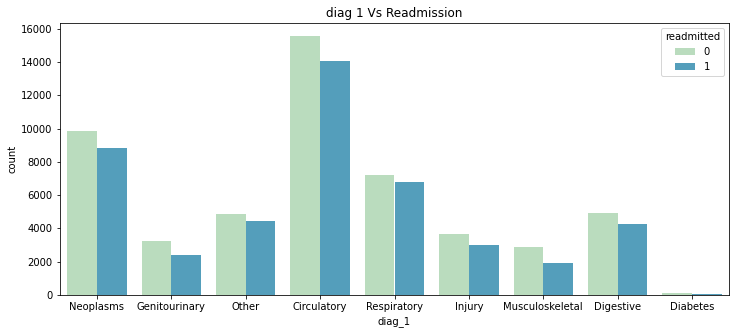

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['diag_1'], hue=df['readmitted'],palette= 'GnBu')
plt.title("diag 1 Vs Readmission");

It's surprising to note that diabetes does not lead the way in terms of primary diagnosis. In fact it is the least diagnosed. Instead patients are primarily diagnosed with a circulatory disease, some common ones being heart attacks, high-blood pressure,chest pains, high cholesterol.

__Source:__ https://www.medicalnewstoday.com/articles/321695

In [ ]:
#Converting back to an integer for modeling purposes moving forward.
df['diag_1']= df.diag_1.map({'Circulatory':0, 'Respiratory':1,'Digestive':2, 'Diabetes':3, 'Injury':4,'Musculoskeletal':5,'Genitourinary':6, 'Neoplasms':7, 'Other':8})

__Consolidation of diag_2 categories.__

In [ ]:
df['diag_2'] = pd.Series(['Circulatory' if (val >=390 and val < 460) or (val == 785)
                          else 'Respiratory' if(val  >= 460 and val < 520) or (val == 786)
                          else 'Digestive' if (val >= 520 and val < 580) or (val == 787)
                          else 'Diabetes' if (val == 250)
                          else 'Injury' if (val >= 800 and val < 1000)
                          else 'Musculoskeletal' if (val >= 710 and val < 740)
                          else 'Genitourinary' if(val >=580  and val < 670) or (val == 788)
                          else 'Neoplasms' if(val  >= 140 and val < 240) or (val >=240 and val < 250) or (val >250 and val < 280) or (val == 780) or (val == 781) or (val == 782) or (val == 784) or (val >= 790 and val < 800) or (val >= 600 and val < 710)
                          else 'Other'for val in df['diag_2']], index=df.index)

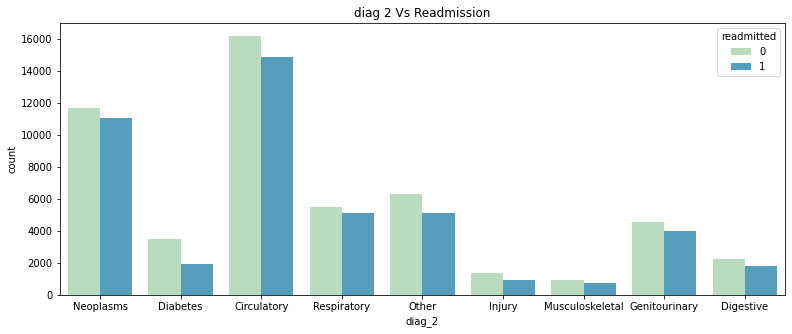

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot(x = df['diag_2'], hue=df['readmitted'],palette= 'GnBu')
plt.title("diag 2 Vs Readmission");

In [ ]:
#Converting back to an integer for modeling purposes moving forward.
df['diag_2']= df.diag_2.map({'Circulatory':0, 'Respiratory':1,'Digestive':2, 'Diabetes':3, 'Injury':4,'Musculoskeletal':5,'Genitourinary':6, 'Neoplasms':7, 'Other':8})

__Consolidation of diag- 3 categories.__

In [ ]:
df['diag_3'] = pd.Series(['Circulatory' if (val >=390 and val < 460) or (val == 785)
                          else 'Respiratory' if(val  >= 460 and val < 520) or (val == 786)
                          else 'Digestive' if (val >= 520 and val < 580) or (val == 787)
                          else 'Diabetes' if (val == 250)
                          else 'Injury' if (val >= 800 and val < 1000)
                          else 'Musculoskeletal' if (val >= 710 and val < 740)
                           else 'Genitourinary' if(val >=580  and val < 670) or (val == 788)
                          else 'Neoplasms' if(val  >= 140 and val < 240) or (val >=240 and val < 250) or (val >250 and val < 280) or (val == 780) or (val == 781) or (val == 782) or (val == 784) or (val >= 790 and val < 800) or (val >= 600 and val < 710)
                          else 'Other'for val in df['diag_3']], index=df.index)

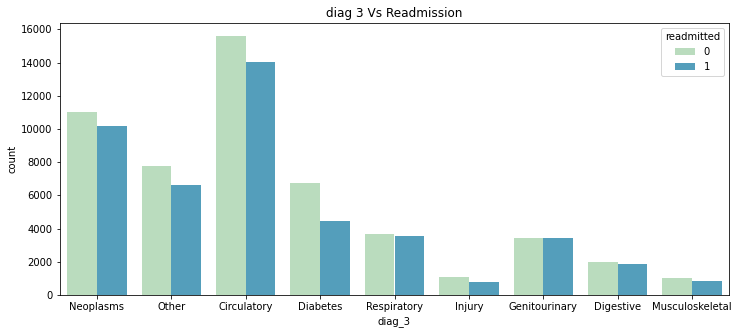

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x = df['diag_3'], hue=df['readmitted'],palette= 'GnBu')
plt.title("diag 3 Vs Readmission");

In [ ]:
#Converting back to an integer for modeling purposes moving forward.
df['diag_3']= df.diag_3.map({'Circulatory':0, 'Respiratory':1,'Digestive':2, 'Diabetes':3, 'Injury':4,'Musculoskeletal':5,'Genitourinary':6, 'Neoplasms':7, 'Other':8})

For each level of diagnoses data, it's noted that diabetes is always one of the least diagnosed diseases. 

__Glucose serum test Result__

The glucose serum test measures a person's blood sugar before and after they drink a liquid that contains glucose. 
When measured a blood sugar level of 200mg/dL or higher indicates a person has diabetes. With this in mind, I grouped our instances of of ">200" and ">300" together as abnormal and dummified all the observations.  

[Source](https://www.cdc.gov/diabetes/basics/getting-tested.html#:~:text=Glucose%20Tolerance%20Test&text=At%202%20hours%2C%20a%20blood,higher%20indicates%20you%20have%20diabetes.)

In [ ]:
df['max_glu_serum'] = pd.Series(['None' if val == 0 
                                 else 'Norm' if val == 1
                                 else "Abnormal" if (val == 2) or (val == 3)
                                 else "Other" for val in df['max_glu_serum']], index=df.index)

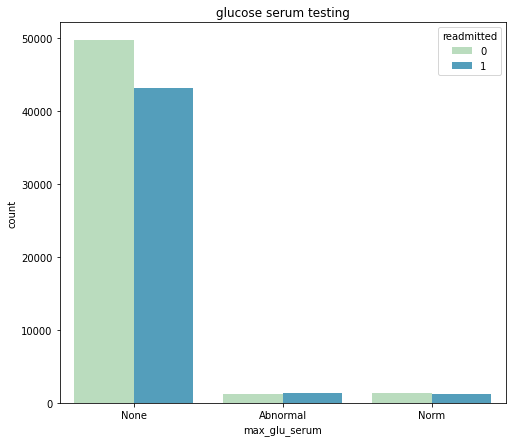

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x = df['max_glu_serum'], hue=df['readmitted'],palette= 'GnBu')
plt.title("glucose serum testing");

In [ ]:
#Converting back to an integer for modeling purposes moving forward.
df['max_glu_serum']= df.max_glu_serum.map({'None':0, 'Norm':1,'Abnormal':2 })

In [ ]:
df.max_glu_serum.value_counts()

0    92844
2     2676
1     2532
Name: max_glu_serum, dtype: int64

__A1c test result__

The A1C test measures your average blood sugar level over the past 2 or 3 months. An A1C below 5.7% is normal, between 5.7 and 6.4% indicates you have prediabetes, and 6.5% or higher indicates you have diabetes. With this in mind, I grouped our instances of of ">7" and ">8" together as abnormal and dummified all the observations. 


[Source](https://www.cdc.gov/diabetes/basics/getting-tested.html#:~:text=Glucose%20Tolerance%20Test&text=At%202%20hours%2C%20a%20blood,higher%20indicates%20you%20have%20diabetes.)

In [ ]:
df.A1Cresult

0        0
1        0
2        0
3        0
4        0
        ..
98047    3
98048    0
98049    0
98050    0
98051    0
Name: A1Cresult, Length: 98052, dtype: int64

In [ ]:
data = df.replace("?",np.nan)
data.isnull().sum()[data.isnull().sum()>1]/len(data)*100

Series([], dtype: float64)

In [ ]:
df['A1Cresult'] = pd.Series(["None" if val == 0 
                                 else "Norm" if val == 1
                                 else "Abnormal" if (val == 2) or (val == 3)
                                 else "Other" for val in df['A1Cresult']], index=df.index)

In [ ]:
df['A1Cresult']= df.A1Cresult.map({'None':0, 'Norm':1, 'Abnormal':2, '>7':2, '>8':3}) 

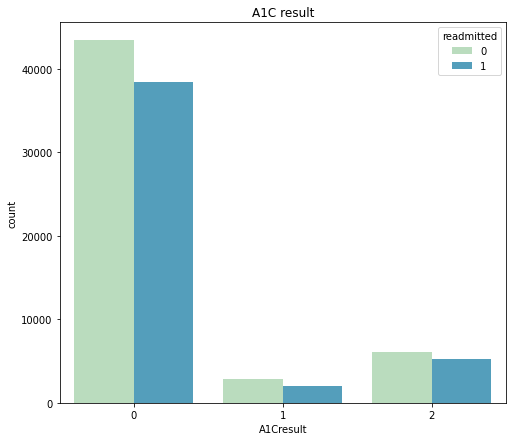

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(x = df['A1Cresult'], hue=df['readmitted'],palette= 'GnBu')
plt.title("A1C result");

In [ ]:
#Converting back to an integer for modeling purposes moving forward.
#df['A1Cresult']= df.A1Cresult.map({'None':0, 'Norm':1,'Abnormal':2 })

In [ ]:
df.A1Cresult

0        0
1        0
2        0
3        0
4        0
        ..
98047    2
98048    0
98049    0
98050    0
98051    0
Name: A1Cresult, Length: 98052, dtype: int64

__Administered Medication__

In [ ]:
generic_medication = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'] 

Variable indicates whether the drug was prescribed or there was a change in the dosage. 
* 0: "No" if the drug was not prescribed
* 1: “steady” if the dosage did not change
* 2: “up” if the dosage was increased during the encounter
* 3: “down” if the dosage was decreased

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 720x432 with 0 Axes>

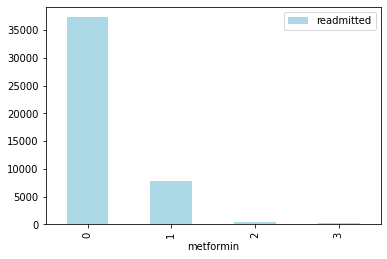

<Figure size 720x432 with 0 Axes>

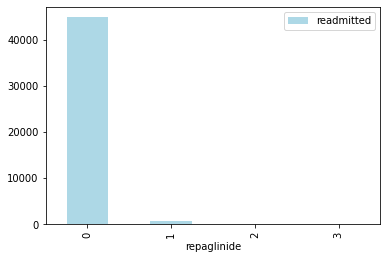

<Figure size 720x432 with 0 Axes>

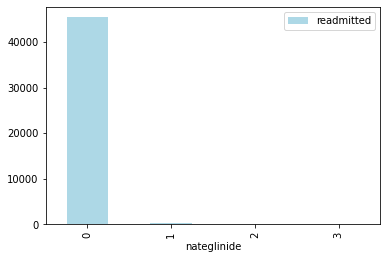

<Figure size 720x432 with 0 Axes>

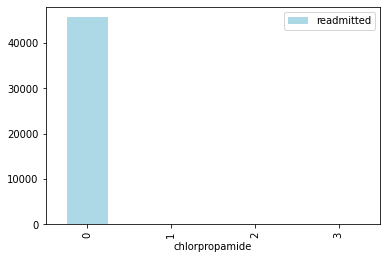

<Figure size 720x432 with 0 Axes>

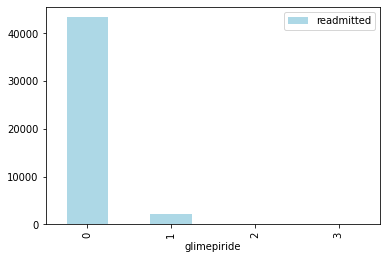

<Figure size 720x432 with 0 Axes>

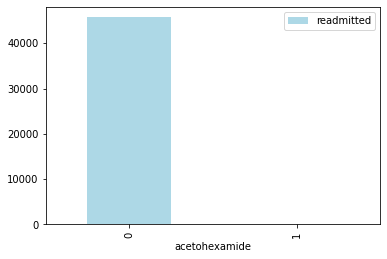

<Figure size 720x432 with 0 Axes>

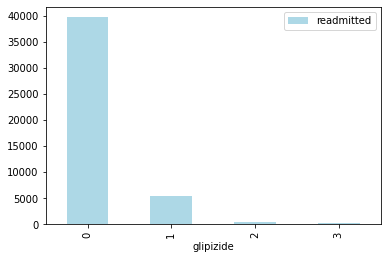

<Figure size 720x432 with 0 Axes>

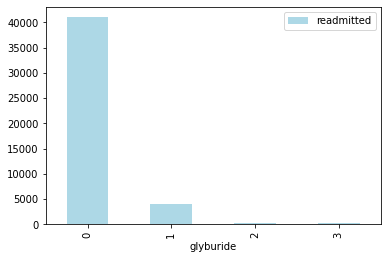

<Figure size 720x432 with 0 Axes>

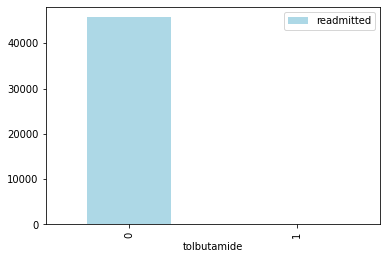

<Figure size 720x432 with 0 Axes>

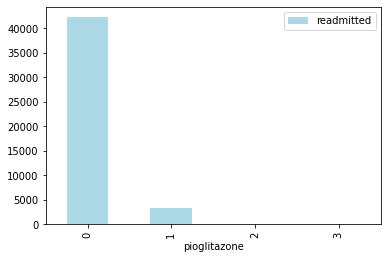

<Figure size 720x432 with 0 Axes>

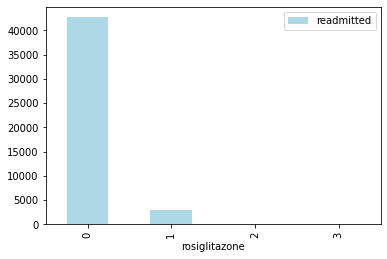

<Figure size 720x432 with 0 Axes>

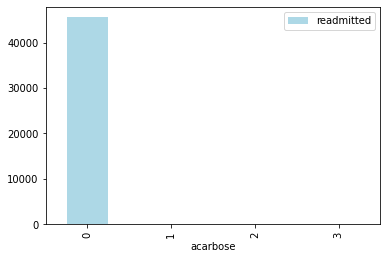

<Figure size 720x432 with 0 Axes>

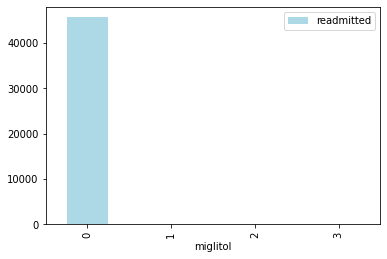

<Figure size 720x432 with 0 Axes>

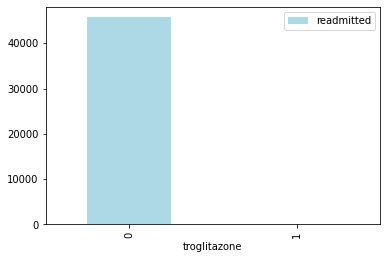

<Figure size 720x432 with 0 Axes>

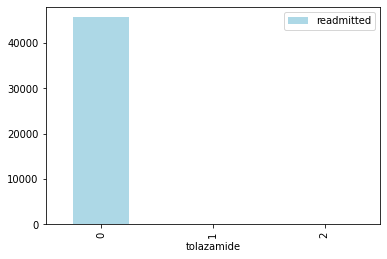

<Figure size 720x432 with 0 Axes>

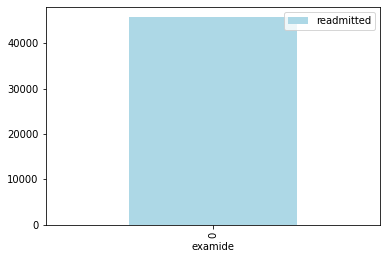

<Figure size 720x432 with 0 Axes>

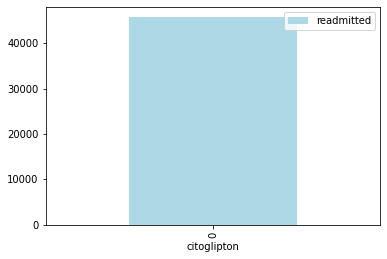

<Figure size 720x432 with 0 Axes>

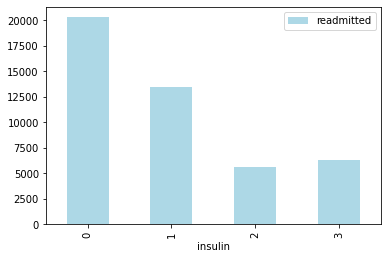

<Figure size 720x432 with 0 Axes>

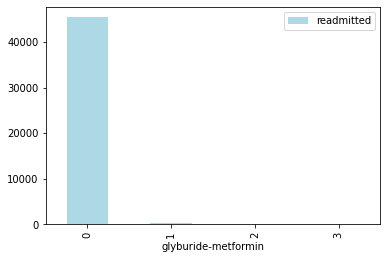

<Figure size 720x432 with 0 Axes>

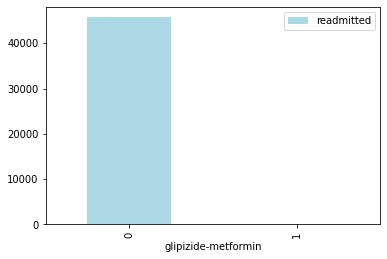

<Figure size 720x432 with 0 Axes>

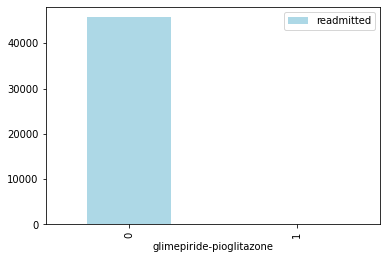

<Figure size 720x432 with 0 Axes>

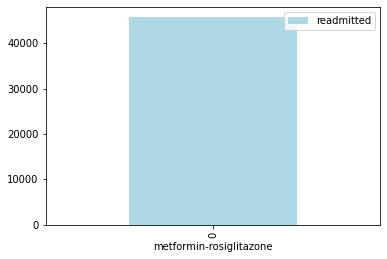

<Figure size 720x432 with 0 Axes>

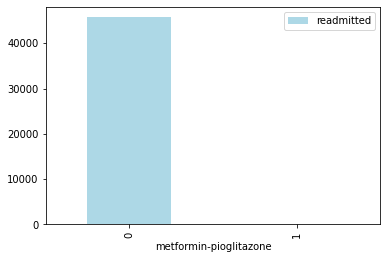

In [ ]:
my_colors = 'LightBlue'
for col in generic_medication:
    plt.figure(figsize=(10,6))
    df.groupby(col)[['readmitted']].sum().plot(kind= 'bar', color = my_colors)

Based on the graphs above, I determined that the following medications were not administered at all, value of "0", I decided to drop these since they had no impact on our overall outcomes.
 
* chlorpropamide
* acetohexamide
* troglitazone 
* tolbutamide
* acarbose
* miglitol
* troglitazone
* tolazamide
* examide
* citoglipton
* glipizide-metformin
* glimepiride-pioglitazone
* metformin-rosiglitazone
* metformin-pioglitazone 

In [ ]:
df.drop(['chlorpropamide','acetohexamide','troglitazone','acarbose','tolbutamide','miglitol','troglitazone','tolazamide','examide','citoglipton',
         'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'], axis=1, inplace=True)

__Change of Medication__

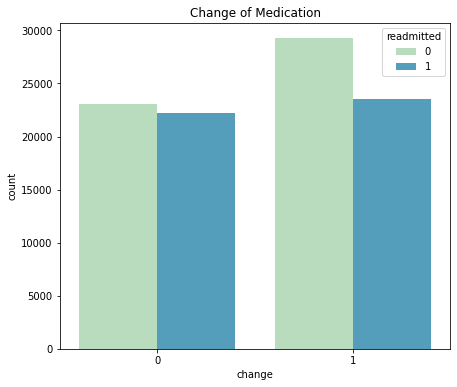

In [ ]:
plt.figure(figsize=(7,6))
sns.countplot(x = df['change'], hue=df['readmitted'],palette= 'GnBu')
plt.title("Change of Medication");

__Diabetes Medication Prescribed__

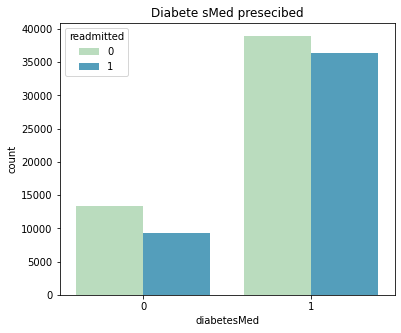

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x = df['diabetesMed'], hue=df['readmitted'],palette= 'GnBu')
plt.title("Diabete sMed presecibed");

__NON CATEGORICAL FEATURES__

In [ ]:
non_cat_columns = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses',]

<Figure size 432x288 with 0 Axes>

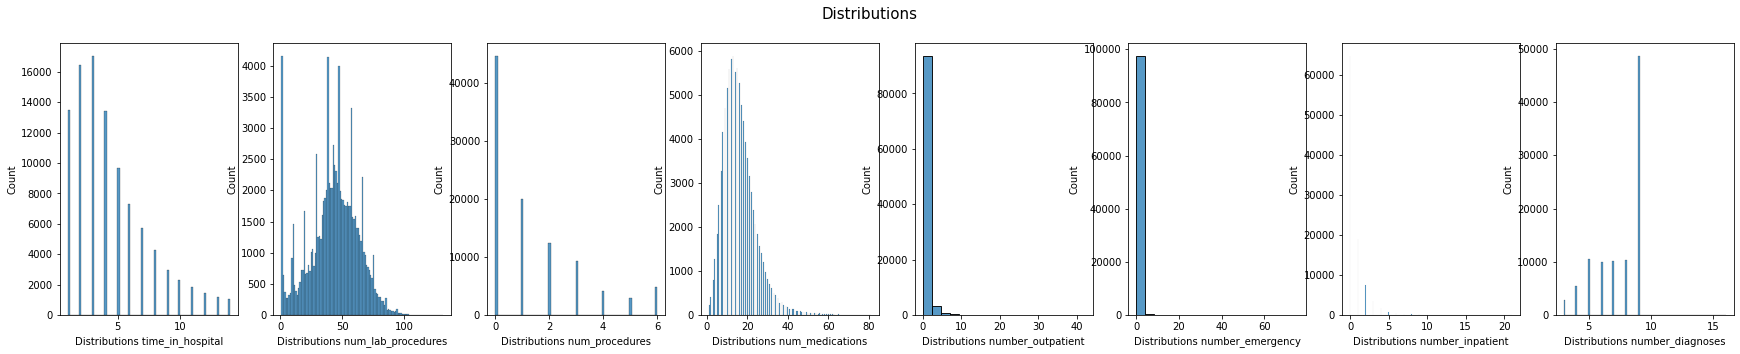

In [ ]:
plt.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(30,5))

for ix, col in enumerate(non_cat_columns):
    sns.histplot(df[col], kde=False, label=col, ax=axes[ix])
    axes[ix].set_xlabel(f'Distributions {col}')

plt.suptitle('Distributions', fontsize=15)
plt.show();

__Time In Hospital__

In [ ]:
df.time_in_hospital.describe()

count    98052.000000
mean         4.422011
std          2.993070
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         14.000000
Name: time_in_hospital, dtype: float64

On average patients spent 4.4 days in the hospital. Shortest being 1 day and the longest being a total of 14 days. 

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

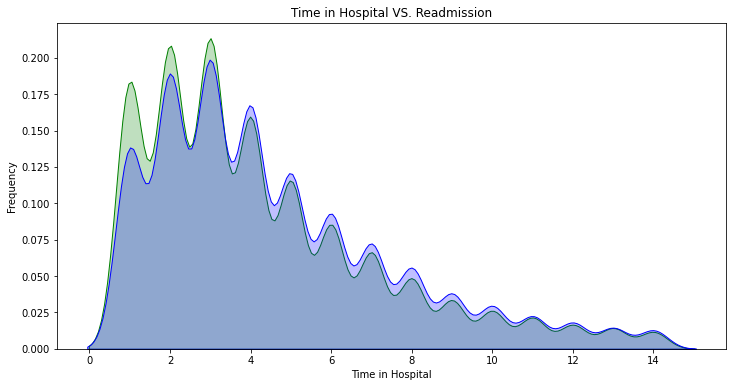

In [ ]:
fig = plt.figure(figsize=(12,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='g',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='b',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

__Number of lab procedures__

In [ ]:
df.num_lab_procedures.describe()

count    98052.000000
mean        43.148462
std         19.711757
min          1.000000
25%         31.000000
50%         44.000000
75%         57.000000
max        132.000000
Name: num_lab_procedures, dtype: float64

* The graph displayed above looks normally distributed with some exception, there seems to be a greater percentage of 0 lab tests performed during initial admission. On average 43 lab tests were performed during the patients' initial admission with a max of 132 performed, for a lay person that seems like a lot of procedures to perform on one patient. A look at the outliers indicates just that with the boxplot displayed below. It looks like anything past 96 procedures isn't the norm. 

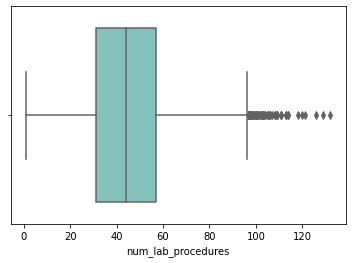

In [ ]:
sns.boxplot(x=df['num_lab_procedures'], palette="GnBu")

In [ ]:
Q1 = df.num_lab_procedures.quantile(0.25)
Q3 = df.num_lab_procedures.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

26.0


In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(-8.0, 96.0)

In [ ]:
outliers = df[(df.num_lab_procedures<lower_limit)|(df.num_lab_procedures>upper_limit)]
outliers

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,change,diabetesMed,readmitted,age_range
313,0,1,[30-40),3,1,2,12,103,4,61,0,0,0,1,0,7,9,0,2,0,0,0,0,0,0,0,0,2,0,0,1,0,4
579,1,0,[60-70),3,1,0,8,97,1,23,0,0,0,7,7,2,9,0,2,0,0,0,0,0,0,0,0,1,0,1,1,0,8
769,0,1,[80-90),3,0,0,7,105,3,16,0,0,0,0,7,7,5,2,2,0,0,0,0,1,0,0,0,0,0,1,1,1,7
776,1,1,[50-60),3,0,0,9,103,1,18,0,0,0,0,6,7,5,2,0,0,0,0,0,0,0,0,0,1,0,1,1,1,6
1006,1,0,[50-60),3,1,2,10,98,5,42,0,0,0,2,7,7,9,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95956,0,0,[30-40),0,0,0,13,99,1,34,0,0,0,7,6,6,9,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,4
96790,0,1,[90-100),0,1,0,8,100,0,14,0,0,0,6,1,0,9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
97002,0,1,[30-40),0,0,0,7,97,1,24,4,1,1,7,7,7,9,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,4
97835,0,1,[40-50),0,1,0,9,98,6,42,0,0,0,0,7,8,9,0,2,0,0,0,0,0,0,0,0,2,0,0,1,0,5


142 observations lie outside the threshold. I've decided to drop these outliers to reduce as much bias as I possibly can. 

In [ ]:
df = df[(df['num_lab_procedures']>lower_limit)&(df['num_lab_procedures']<upper_limit)]

In [ ]:
df.shape

(97882, 33)

Text(0.5, 1.0, 'Number of Lab Procedures VS. Readmission')

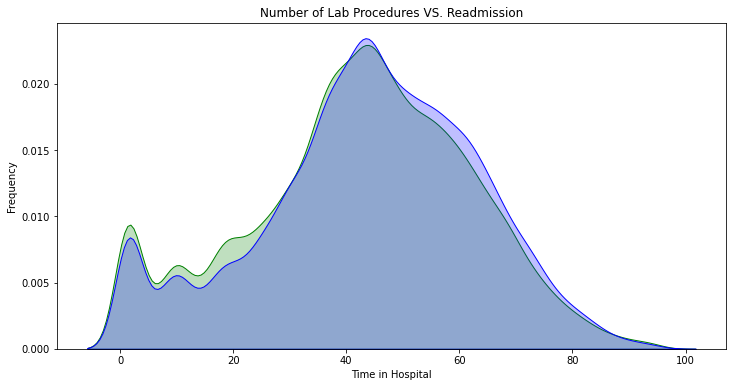

In [ ]:
fig = plt.figure(figsize=(12,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='g',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='b',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Number of Lab Procedures VS. Readmission')

__Number of Procedures__

In [ ]:
df.num_procedures.describe()

count    97882.000000
mean         1.348052
std          1.706557
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: num_procedures, dtype: float64

On average 1.3 non-lab test procedures were performed during the patients initial admission.

__Number of medications__

In [ ]:
df.num_medications.describe()

count    97882.000000
mean        16.100213
std          8.090172
min          1.000000
25%         11.000000
50%         15.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64

* On average 16 distinct generic generic types of medication were administered to the patient during their initial admission. A maximum of 81 distinct types of medication were administered which I deem to be a large amount for one patient and possibly not the norm, since that a big jump from the average. A look at the outliers indicates just that with the boxplot displayed below. It looks like anything past 33 distinct types of medications isn't the falls out of the upper limit. 

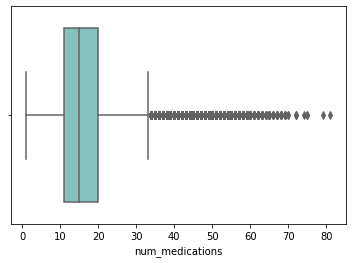

In [ ]:
sns.boxplot(x=df['num_medications'], palette="GnBu")

In [ ]:
Q1 = df.num_medications.quantile(0.25)
Q3 = df.num_medications.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

9.0


In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit, upper_limit

(-2.5, 33.5)

In [ ]:
outliers = df[(df.num_medications<lower_limit)|(df.num_medications>upper_limit)]
outliers

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,glyburide-metformin,change,diabetesMed,readmitted,age_range
138,0,1,[70-80),3,1,0,8,61,2,39,0,0,0,2,2,0,9,0,0,0,0,0,0,0,0,0,0,2,0,0,1,1,9
336,0,0,[60-70),0,0,0,8,77,4,40,0,0,0,0,1,7,9,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,8
384,0,1,[50-60),2,0,2,8,76,6,46,0,0,0,0,0,1,9,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,6
435,0,0,[50-60),2,0,2,10,71,6,41,0,0,0,0,0,4,9,0,0,0,0,0,2,0,0,0,0,2,0,0,1,0,6
476,0,1,[70-80),0,0,2,7,78,3,36,0,0,0,0,0,0,6,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97834,0,1,[60-70),0,0,0,11,81,1,36,0,0,0,2,6,8,9,0,0,0,0,0,0,1,0,0,0,2,0,0,1,0,8
97865,0,1,[50-60),0,0,0,4,41,3,40,0,0,2,0,0,0,9,0,0,3,0,0,0,0,0,0,0,2,0,0,1,1,6
97911,0,0,[70-80),1,1,1,4,7,1,36,0,0,0,5,8,5,8,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,9
98004,4,1,[70-80),2,1,0,8,67,3,35,0,1,0,2,7,7,9,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,9


3262 observations lie outside the threshold. I've decided to drop these outliers to reduce as much bias a I possibly can.

In [ ]:
df = df[(df['num_medications']>lower_limit)&(df['num_medications']<upper_limit)]

Text(0.5, 1.0, 'Number of Medications VS. Readmission')

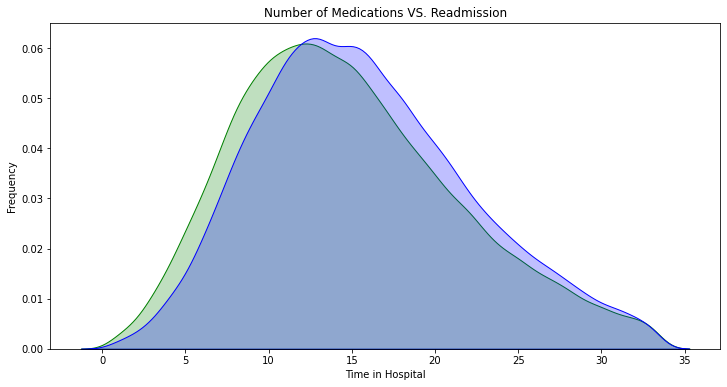

In [ ]:
fig = plt.figure(figsize=(12,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_medications'] , color='g',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_medications'] , color='b',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Number of Medications VS. Readmission')

In [ ]:
df.shape

(94620, 33)

__Number of Outpatient visits__ 

In [ ]:
df.number_outpatient.describe()

count    94620.000000
mean         0.378292
std          1.291424
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         42.000000
Name: number_outpatient, dtype: float64

In [ ]:
df.number_outpatient.value_counts()

0     78808
1      8001
2      3415
3      1951
4      1055
5       507
6       283
7       149
8        95
9        78
10       55
11       40
12       29
13       29
14       28
15       20
16       15
17        8
21        7
20        7
22        5
18        5
19        3
24        3
27        3
23        2
25        2
26        2
29        2
33        2
35        2
36        2
40        1
28        1
34        1
37        1
38        1
39        1
42        1
Name: number_outpatient, dtype: int64

The number of outpatient visits of the patient in the year preceding the encounter ranged from zero visits all the way up to 42 visits. 

__Number of Emergency visits__

In [ ]:
df.number_emergency.describe()

count    94620.000000
mean         0.204692
std          0.952688
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         76.000000
Name: number_emergency, dtype: float64

In [ ]:
df.number_emergency.value_counts()

0     83717
1      7333
2      1960
3       703
4       360
5       185
6        91
7        72
8        50
10       33
9        31
11       20
13       12
12       10
22        6
18        5
16        5
20        4
19        4
15        3
14        2
21        2
25        2
76        1
54        1
24        1
28        1
29        1
37        1
42        1
46        1
64        1
63        1
Name: number_emergency, dtype: int64

__Number of Inpatient Visits__

In [ ]:
df.number_inpatient.value_counts()

0     62271
1     18444
2      7171
3      3257
4      1549
5       782
6       457
7       257
8       139
9       110
10       58
11       47
12       33
13       19
14       10
15        8
16        5
19        2
21        1
Name: number_inpatient, dtype: int64

In [ ]:
df.number_inpatient.describe()

count    94620.000000
mean         0.649387
std          1.273185
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         21.000000
Name: number_inpatient, dtype: float64

The number of inpatient visits of the patient in the year preceding the encounter ranged from zero visits all the way up to 21 visits. 

In [ ]:
df.shape

(94620, 33)

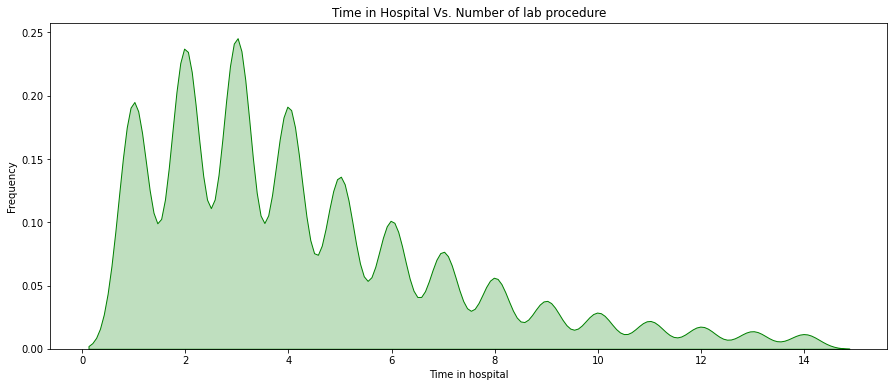

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df['time_in_hospital'], color='g',shade=True)
#ax=sns.kdeplot(df.loc[(df['readmitted']),'num_lab_procedures'] , color='b',shade=True, label='readmitted')
ax.set(xlabel='Time in hospital', ylabel='Frequency')
plt.title('Time in Hospital Vs. Number of lab procedure');

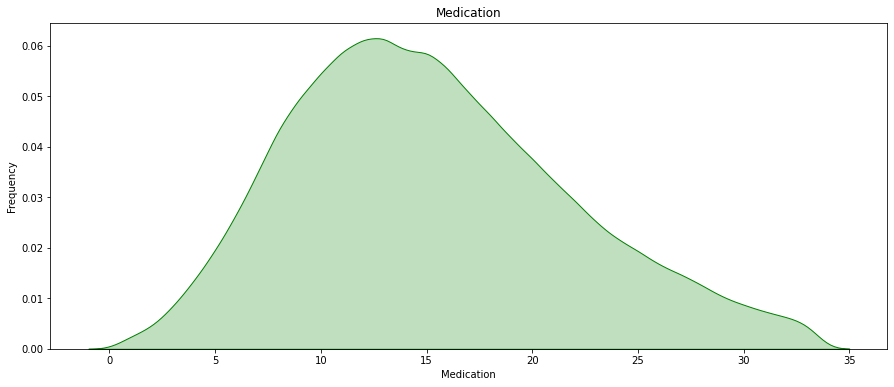

In [ ]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df['num_medications'], color='g',shade=True)
# ax=sns.kdeplot(df.loc[(df['time_in_hospital']),'num_lab_procedures'] , color='b',shade=True, label='readmitted')
ax.set(xlabel='Medication', ylabel='Frequency')
plt.title('Medication');

In [ ]:
df.time_in_hospital.value_counts()

3     16942
2     16395
1     13470
4     13207
5      9382
6      6977
7      5293
8      3874
9      2614
10     1974
11     1519
12     1209
13      960
14      804
Name: time_in_hospital, dtype: int64

In [ ]:
pd.DataFrame(list(zip(df['num_lab_procedures'],df['time_in_hospital'])))

,0,1
0,59,3
1,11,2
2,44,2
3,51,1
4,31,3
...,...,...
94615,51,3
94616,33,5
94617,53,1
94618,45,10


In [ ]:
df.shape

(94620, 33)

After all our cleaning, we are left with 32 features, 1 target feature,  and 94,620 observations. 

### CORRELATIONS

In [ ]:
diab_matrix = df.corr().sort_values('readmitted')
diab_matrix['readmitted']

admission_source_id        -0.070816
change                     -0.048486
num_procedures             -0.039398
race                       -0.026967
metformin                  -0.025616
diag_1                     -0.017276
gender                     -0.015488
A1Cresult                  -0.010915
diag_2                     -0.008815
diag_3                     -0.001576
glyburide                  -0.001306
admission_type_id           0.002322
glyburide-metformin         0.002923
nateglinide                 0.003417
glimepiride                 0.004827
rosiglitazone               0.008192
pioglitazone                0.013175
max_glu_serum               0.014632
repaglinide                 0.018869
glipizide                   0.021314
discharge_disposition_id    0.023163
age_range                   0.036338
num_lab_procedures          0.041231
time_in_hospital            0.053398
diabetesMed                 0.064901
insulin                     0.068595
num_medications             0.071908
n

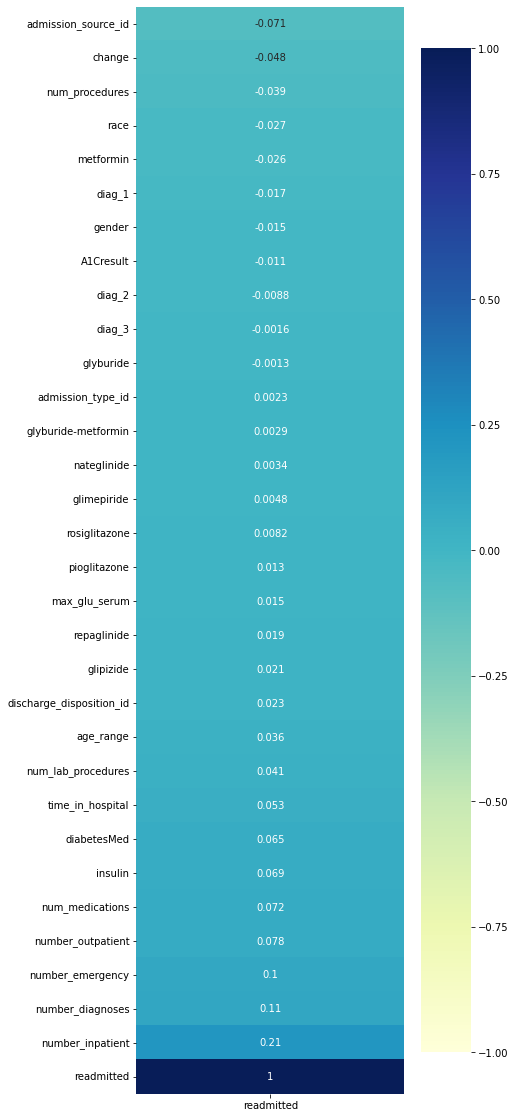

In [ ]:
plt.figure(figsize=(6,20))
sns.heatmap(diab_matrix[['readmitted']],
           annot=True,
           cmap='YlGnBu',
           vmin=-1,
           vmax=1)

In [ ]:
df1 = df[non_cat_columns]

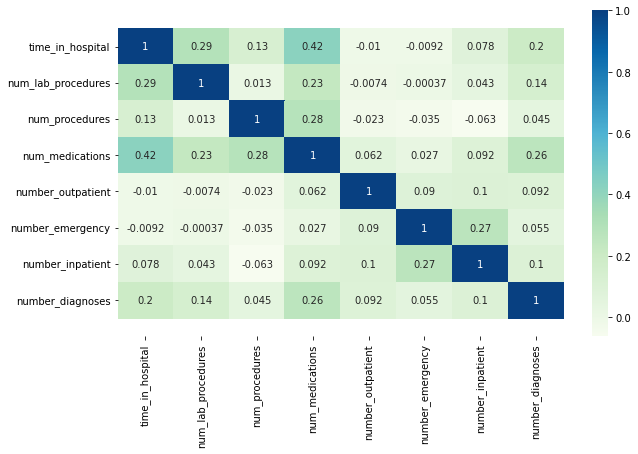

In [ ]:
plt.figure(figsize=(10,6))
corr=df1.corr()
sns.heatmap(corr,annot=True,cmap='GnBu')
b,t=plt.ylim()
plt.ylim(b+0.5,t-0.5)
plt.show()

These correlations aren't very strong (>0.5), the variables with the strongest correlations to our target variable of readmission, are the number of impatient visits, number of diagnosis, and number of emergency visit in the preceding year.

In [ ]:
df.shape

(94620, 33)

In [ ]:
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/diabetic_data_modeling.csv')